In [33]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [34]:
# RUN THIS CELL 
import requests
from IPython.core.display import display, HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text

# scrollable output
styles += """
<style>
    div.output_scroll { 
        height: 300px; 
        overflow-y: auto;
    }
    
    div.output_wrapper {
        overflow-x: auto;
    }
</style>
"""
HTML(styles)

/var/folders/9c/7d5d4vv50tlg0qp7ks_m2mtc0000gn/T/ipykernel_1519/1233485917.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [35]:
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
                            
# For optional causal inference section
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [36]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

In [37]:
# set settings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
sns.set_palette("husl")
seed = 109

# load and rename data
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")

column_mapping = {
    'Marital status': 'marital_status',
    'Application mode': 'app_mode',
    'Application order': 'app_order',
    'Course': 'course',
    'Daytime/evening attendance': 'daytime',
    'Previous qualification': 'prev_qual',
    'Previous qualification (grade)': 'prev_qual_grade',
    'Nationality': 'nationality',
    "Mother's qualification": 'mother_qual',
    "Father's qualification": 'father_qual',
    "Mother's occupation": 'mother_occ',
    "Father's occupation": 'father_occ',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship',
    'Age at enrollment': 'age',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'sem1_credited',
    'Curricular units 1st sem (enrolled)': 'sem1_enrolled',
    'Curricular units 1st sem (evaluations)': 'sem1_evaluations',
    'Curricular units 1st sem (approved)': 'sem1_approved',
    'Curricular units 1st sem (grade)': 'sem1_grade',
    'Curricular units 1st sem (without evaluations)': 'sem1_without_eval',
    'Curricular units 2nd sem (credited)': 'sem2_credited',
    'Curricular units 2nd sem (enrolled)': 'sem2_enrolled',
    'Curricular units 2nd sem (evaluations)': 'sem2_evaluations',
    'Curricular units 2nd sem (approved)': 'sem2_approved',
    'Curricular units 2nd sem (grade)': 'sem2_grade',
    'Curricular units 2nd sem (without evaluations)': 'sem2_without_eval',
    'Unemployment rate': 'unemployment',
    'Inflation rate': 'inflation',
    'GDP': 'gdp',
    'Target': 'target'
}

X_train = X_train.rename(columns=column_mapping)
X_test = X_test.rename(columns=column_mapping)
y_train = y_train.rename(columns=column_mapping)

df_train = X_train.copy()
df_train['target'] = y_train

In [38]:
display(X_train.head(10))
print("Here is a set of all the columns in X_train, i.e. our predictors, after renaming:")
print(X_train.columns)

,marital_status,app_mode,app_order,course,daytime,prev_qual,prev_qual_grade,nationality,mother_qual,father_qual,mother_occ,father_occ,admission_grade,displaced,special_needs,debtor,tuition_up_to_date,gender,scholarship,age,international,sem1_credited,sem1_enrolled,sem1_evaluations,sem1_approved,sem1_grade,sem1_without_eval,sem2_credited,sem2_enrolled,sem2_evaluations,sem2_approved,sem2_grade,sem2_without_eval,unemployment,inflation,gdp
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.200000,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.000000,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.750000,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.000000,0,0,5,10,0,0.000000,0,10.8,1.4,1.74
5,1,17,1,9670,1,1,155.0,1,1,19,4,8,134.7,1,0,0,1,0,0,20,0,0,6,8,5,13.400000,0,0,6,10,4,13.000000,0,12.7,3.7,-1.70
6,1,43,1,9147,1,1,133.1,1,4,19,2,1,128.2,0,0,0,1,0,0,23,0,7,11,18,11,15.090909,1,2,6,7,6,14.500000,0,9.4,-0.8,-3.12
7,1,17,3,9853,1,1,132.0,1,34,34,0,0,131.3,1,0,0,1,0,0,21,0,0,6,8,5,11.800000,0,0,6,8,4,10.500000,0,7.6,2.6,0.32
8,1,1,1,9119,1,1,130.0,1,37,19,9,5,140.2,1,0,0,1,1,0,20,0,0,5,5,0,0.000000,0,0,5,0,0,0.000000,0,9.4,-0.8,-3.12
9,1,44,1,9003,1,39,140.0,1,19,38,3,9,140.0,1,0,0,1,1,0,21,0,0,6,7,6,12.857143,0,0,6,6,6,13.166667,0,12.4,0.5,1.79


Here is a set of all the columns in X_train, i.e. our predictors, after renaming:
Index(['marital_status', 'app_mode', 'app_order', 'course', 'daytime',
       'prev_qual', 'prev_qual_grade', 'nationality', 'mother_qual',
       'father_qual', 'mother_occ', 'father_occ', 'admission_grade',
       'displaced', 'special_needs', 'debtor', 'tuition_up_to_date', 'gender',
       'scholarship', 'age', 'international', 'sem1_credited', 'sem1_enrolled',
       'sem1_evaluations', 'sem1_approved', 'sem1_grade', 'sem1_without_eval',
       'sem2_credited', 'sem2_enrolled', 'sem2_evaluations', 'sem2_approved',
       'sem2_grade', 'sem2_without_eval', 'unemployment', 'inflation', 'gdp'],
      dtype='object')


In [39]:
display(y_train.head(10))
print("Here is a set of all the columns in y_train, i.e. our response variable: ")
print(set(y_train.columns))

# get counts of each class
print("Here are the counts for each class: ")
y_train.value_counts()

,target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout
5,Enrolled
6,Dropout
7,Dropout
8,Dropout
9,Graduate


Here is a set of all the columns in y_train, i.e. our response variable: 
{'target'}
Here are the counts for each class: 


target  
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

Notice that this is a case of class imbalance. The 'enrolled' class is significantly underrepresented compared to both the 'graduate' and 'dropout' classes. This imbalance could cause the model to bias towards predicting the majority classes, particularly 'graduate'. To address this, we may need to use techniques like class weights or SMOTE to ensure the model learns to identify the minority 'enrolled' class effectively and doesn't simply optimize overall accuracy by focusing on the larger classes.

To conduct a full EDA, I will split the predictors into three categories, each of which I believe are likely to impact student outcomes after the course is finished.
- Category 1: Demographic predictors. This category includes this like age, gender, marital status, nationality, and whether the student requires special needs.
- Category 2: Economic predictors. This category includes information about a student's socioeconomic status, like the parents' employment, the amount of debt they have, etc.
- Category 3: Academic predictors. This category includes information about a student's academic performance, including grades before application, grades after the first semester, and grades after the second semester.

I produce tables and pairplots for all three categories of predictors.

In [40]:
demographic_numeric = ['age']
demographic_categorical = ['gender', 'marital_status', 'special_needs', 'international', 'displaced']
demographic_predictors = demographic_numeric + demographic_categorical

economic_numeric = ['unemployment', 'inflation', 'gdp']
economic_categorical = ['mother_occ', 'father_occ', 'debtor', 'tuition_up_to_date', 'scholarship']
economic_predictors = economic_numeric + economic_categorical

academic_predictors = ['prev_qual_grade', 'admission_grade', 'sem1_grade', 'sem1_approved', 'sem1_enrolled', 'sem1_evaluations', 'sem2_grade', 'sem2_approved', 'sem2_enrolled', 'sem2_evaluations']

categorical_predictors = demographic_categorical + economic_categorical
numeric_predictors = demographic_numeric + economic_numeric + academic_predictors
predictors = categorical_predictors + numeric_predictors

X_train = X_train[predictors]
X_test = X_test[predictors]

Note: categorical variables with more than two categories have their small categories lumped into "other" (or -1) using a threshold value of 1%. I.e. if there is a category with fewer than 1 percent of observations, that category gets merged into "other".

In [41]:
def lump_small_categories(series, threshold_pct = 5):
  """
  lump small categories into 'other'
  """
  # get percentages
  value_counts = series.value_counts(normalize=True) * 100
  small_categories = value_counts[value_counts < threshold_pct].index
  
  # create new series with lumped categories
  lumped_series = series.copy()
  lumped_series[lumped_series.isin(small_categories)] = -1
  
  return lumped_series

df_train["marital_status"] = lump_small_categories(df_train["marital_status"])
df_train["mother_occ"] = lump_small_categories(df_train["mother_occ"])
df_train["father_occ"] = lump_small_categories(df_train["father_occ"])
X_train["marital_status"] = lump_small_categories(X_train["marital_status"])
X_train["mother_occ"] = lump_small_categories(X_train["mother_occ"])
X_train["father_occ"] = lump_small_categories(X_train["father_occ"])
X_test["marital_status"] = lump_small_categories(X_test["marital_status"])
X_test["mother_occ"] = lump_small_categories(X_test["mother_occ"])
X_test["father_occ"] = lump_small_categories(X_test["father_occ"])

Here are summary tables and figures for the three different sets of predictors:

In [42]:
def summarize_numeric(df, numeric_cols):
  """
  create summary table for numeric variables
  """
  summary = df[numeric_cols].agg(['mean', 'std', 'min', 'max']).round(2)
  return summary.T

def summarize_categorical(df, cat_cols):
  """
  create summary table for categorical variables 
  """
  summary_rows = []
  
  for col in cat_cols:
    dist = (df[col].value_counts(normalize=True) * 100).round(2)
    summary_rows.append({
        'variable': col,
        'n_unique': df[col].nunique(),
        'distribution': dist.to_dict()
    })
      
  return pd.DataFrame(summary_rows)

In [43]:
def plot_numeric(df, x_name, y_name, ax, title=None, xlabel=None, ylabel=None, rotate_labels=45, violin_kwargs=None):
    if violin_kwargs is None:
        violin_kwargs = {}
    
    sns.violinplot(data=df, x=df[x_name], y=df[y_name], ax=ax, **violin_kwargs)
    
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=rotate_labels)
    
def plot_categorical(df, x_name, y_name, ax, title=None, value_map = None, xlabel=None, ylabel=None, rotate_labels=45, bar_kwargs=None):
    if bar_kwargs is None:
        bar_kwargs = {}
    
    if value_map is not None:
       y_values = df[y_name].map(value_map)
    else:
       y_values = df[y_name]
    
    # create crosstab with x classes as index and y as columns
    ct = pd.crosstab(index=df[x_name], columns=y_values, normalize='index') * 100
    
    
    # sort columns by size
    column_means = ct.mean()
    sorted_columns = column_means.sort_values().index
    ct = ct[sorted_columns]  # Reorder columns from smallest to largest
    
    ct.plot(kind='bar', stacked=True, ax=ax, **bar_kwargs)
    
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=rotate_labels)
    ax.legend(title=y_name)

In [44]:
print("SUMMARY: DEMOGRAPHIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, demographic_numeric))

print("\nCategorical Variables:")
print(summarize_categorical(df_train, demographic_categorical))

SUMMARY: DEMOGRAPHIC PREDICTORS
--------------------------------------------------

Numeric Variables:
      mean  std   min   max
age  23.25  7.6  17.0  70.0

Categorical Variables:
         variable  n_unique                  distribution
0          gender         2          {0: 64.92, 1: 35.08}
1  marital_status         3  {1: 89.0, 2: 8.32, -1: 2.68}
2   special_needs         2           {0: 98.82, 1: 1.18}
3   international         2           {0: 97.68, 1: 2.32}
4       displaced         2          {1: 54.67, 0: 45.33}


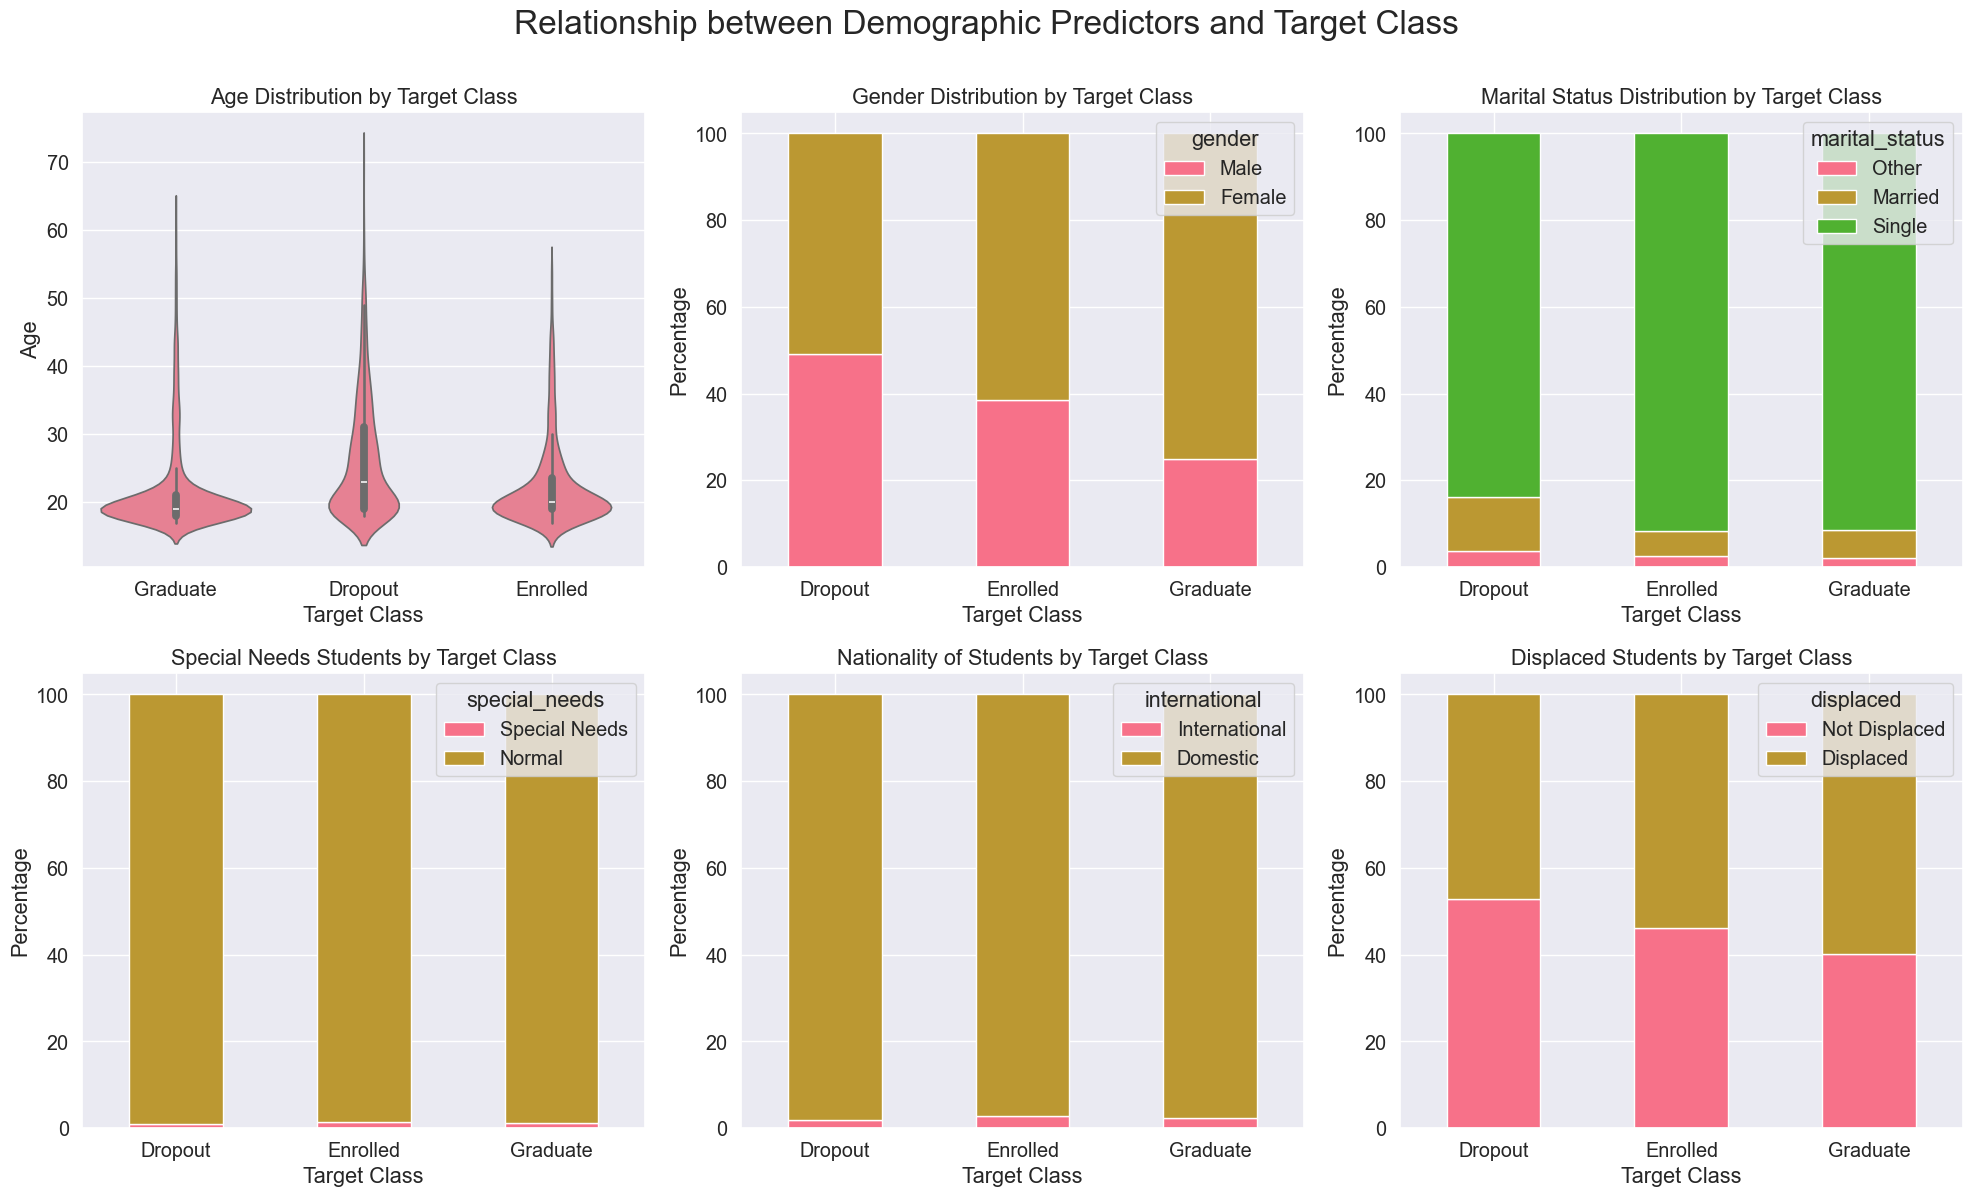

In [45]:
# subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Relationship between Demographic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "age", axes[0], title="Age Distribution by Target Class", xlabel="Target Class", ylabel="Age", rotate_labels=0, violin_kwargs=None)
plot_categorical(df_train, "target" , "gender", axes[1], title="Gender Distribution by Target Class", value_map={0: "Female", 1: "Male"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "marital_status", axes[2], title="Marital Status Distribution by Target Class", value_map={1: "Single", 2: "Married", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "special_needs", axes[3], title="Special Needs Students by Target Class", value_map={0: "Normal", 1: "Special Needs"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "international", axes[4], title="Nationality of Students by Target Class", value_map={0: "Domestic", 1: "International"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "displaced", axes[5], title="Displaced Students by Target Class", value_map={0: "Not Displaced", 1: "Displaced"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)

plt.tight_layout()
plt.show()

In [46]:
print("\nSUMMARY: ECONOMIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, economic_numeric))

print("\nCategorical Variables:")
print(summarize_categorical(df_train, economic_categorical))


SUMMARY: ECONOMIC PREDICTORS
--------------------------------------------------

Numeric Variables:
               mean   std   min    max
unemployment  11.59  2.67  7.60  16.20
inflation      1.22  1.38 -0.80   3.70
gdp            0.01  2.26 -4.06   3.51

Categorical Variables:
             variable  n_unique                                       distribution
0          mother_occ         7  {9: 35.74, 4: 18.47, -1: 12.33, 5: 12.24, 3: 7...
1          father_occ         9  {9: 22.94, -1: 14.62, 7: 14.32, 5: 11.57, 4: 8...
2              debtor         2                               {0: 88.73, 1: 11.27}
3  tuition_up_to_date         2                               {1: 88.03, 0: 11.97}
4         scholarship         2                               {0: 74.83, 1: 25.17}


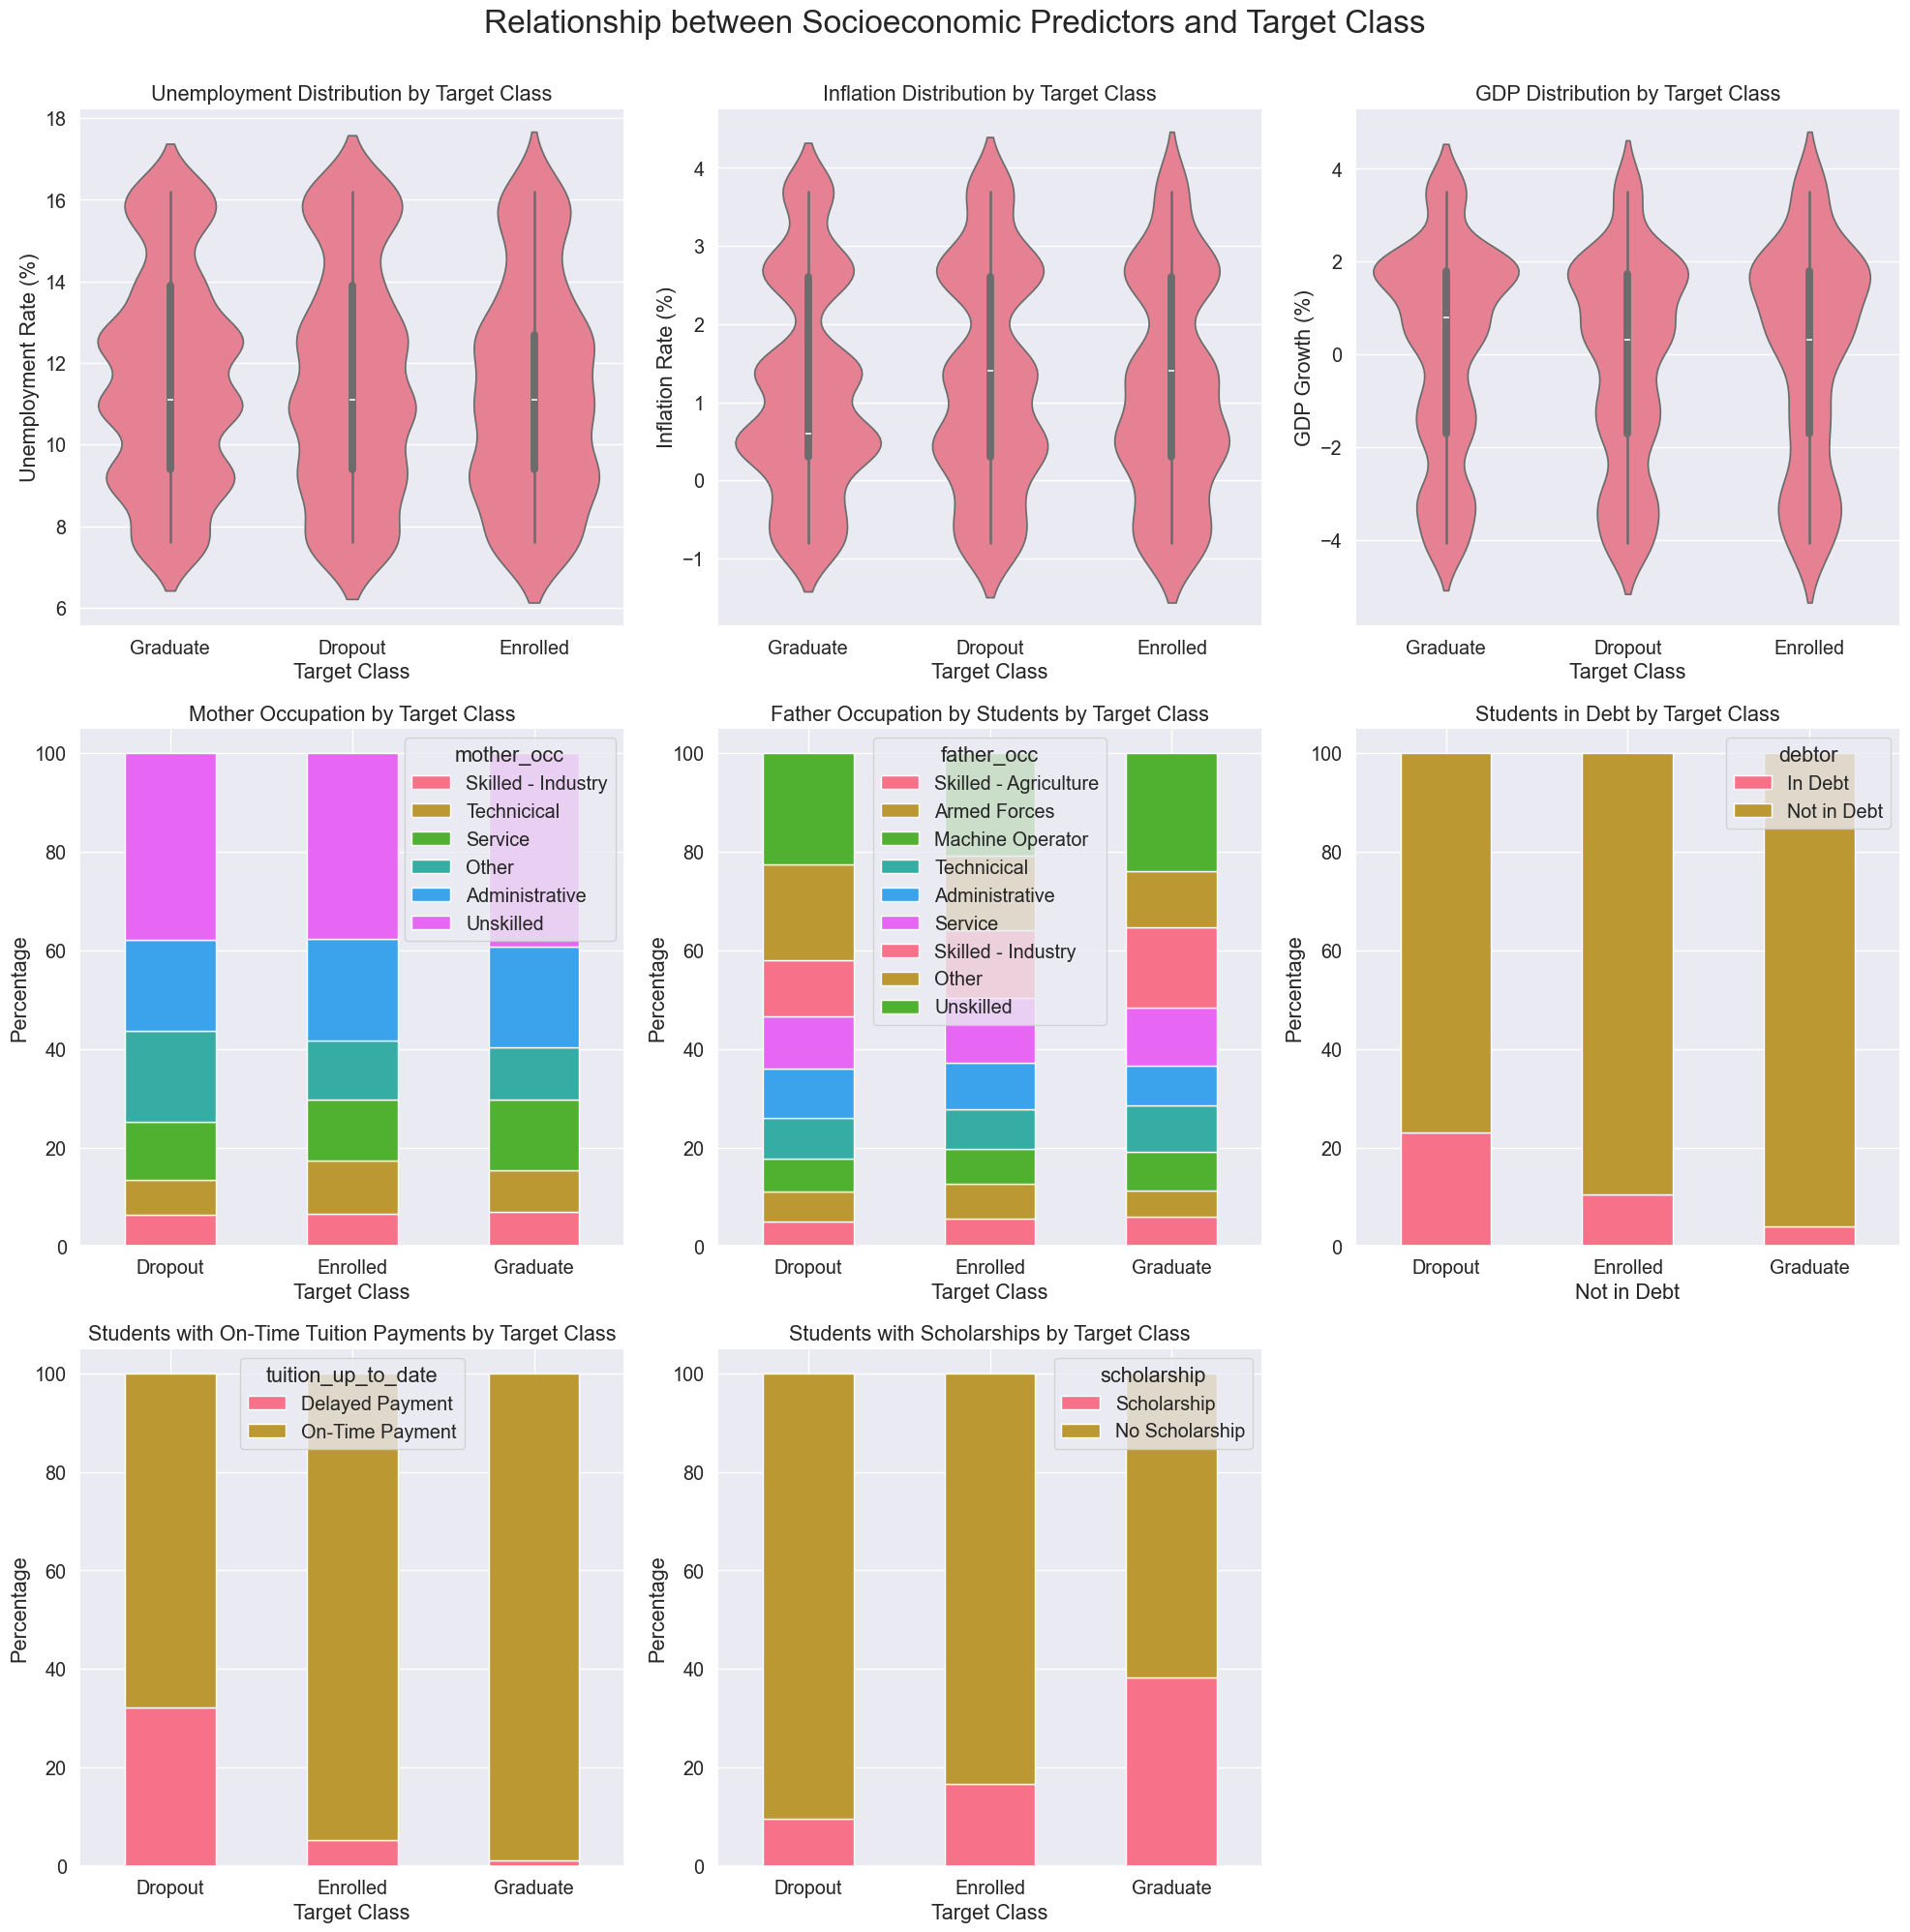

In [47]:
# subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Relationship between Socioeconomic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "unemployment", axes[0], title="Unemployment Distribution by Target Class", xlabel="Target Class", ylabel="Unemployment Rate (%)", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "inflation", axes[1], title="Inflation Distribution by Target Class", xlabel="Target Class", ylabel="Inflation Rate (%)", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "gdp", axes[2], title="GDP Distribution by Target Class", xlabel="Target Class", ylabel="GDP Growth (%)", rotate_labels=0, violin_kwargs=None)
plot_categorical(df_train, "target" , "mother_occ", axes[3], title="Mother Occupation by Target Class", value_map={3: "Technicical", 4: "Administrative", 5: "Service", 6: "Skilled - Agriculture", 7: "Skilled - Industry", 8: "Machine Operator", 9: "Unskilled", 10: "Armed Forces", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "father_occ", axes[4], title="Father Occupation by Students by Target Class", value_map={3: "Technicical", 4: "Administrative", 5: "Service", 6: "Skilled - Agriculture", 7: "Skilled - Industry", 8: "Machine Operator", 9: "Unskilled", 10: "Armed Forces", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "debtor", axes[5], title="Students in Debt by Target Class", value_map={0: "Not in Debt", 1: "In Debt"}, xlabel="Not in Debt", ylabel="In Debt", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "tuition_up_to_date", axes[6], title="Students with On-Time Tuition Payments by Target Class", value_map={0: "Delayed Payment", 1: "On-Time Payment"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "scholarship", axes[7], title="Students with Scholarships by Target Class", value_map={0: "No Scholarship", 1: "Scholarship"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [48]:
print("\nSUMMARY: ACADEMIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, academic_predictors))


SUMMARY: ACADEMIC PREDICTORS
--------------------------------------------------

Numeric Variables:
                    mean    std   min     max
prev_qual_grade   132.82  13.25  95.0  190.00
admission_grade   126.93  14.63  95.0  190.00
sem1_grade         10.63   4.87   0.0   18.88
sem1_approved       4.70   3.09   0.0   26.00
sem1_enrolled       6.27   2.49   0.0   26.00
sem1_evaluations    8.29   4.19   0.0   45.00
sem2_grade         10.20   5.25   0.0   18.57
sem2_approved       4.43   3.02   0.0   20.00
sem2_enrolled       6.22   2.20   0.0   23.00
sem2_evaluations    8.04   3.95   0.0   33.00


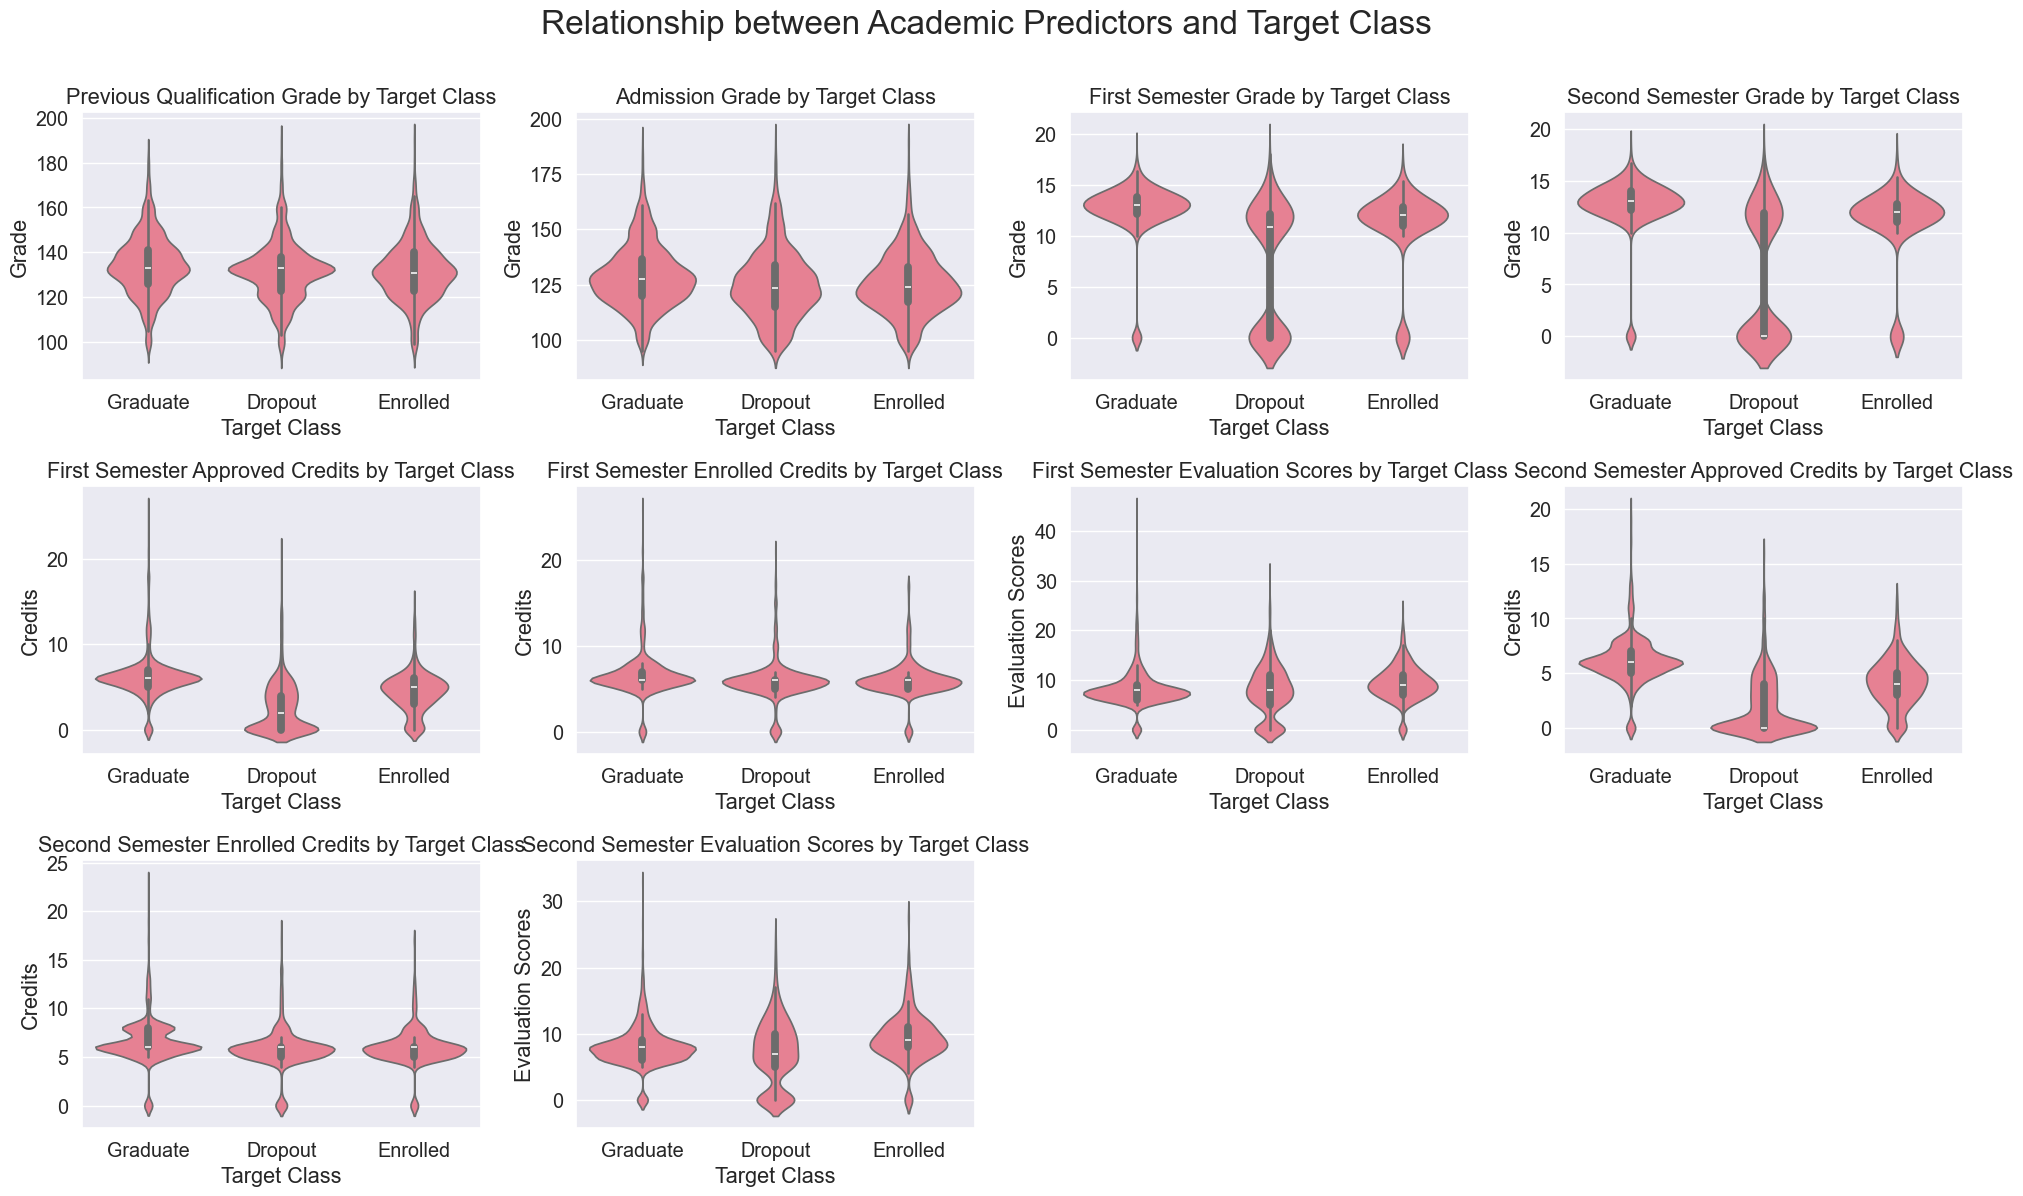

In [49]:
# subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Relationship between Academic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "prev_qual_grade", axes[0], title="Previous Qualification Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "admission_grade", axes[1], title="Admission Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_grade", axes[2], title="First Semester Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_grade", axes[3], title="Second Semester Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_approved", axes[4], title="First Semester Approved Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_enrolled", axes[5], title="First Semester Enrolled Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_evaluations", axes[6], title="First Semester Evaluation Scores by Target Class", xlabel="Target Class", ylabel="Evaluation Scores", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_approved", axes[7], title="Second Semester Approved Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_enrolled", axes[8], title="Second Semester Enrolled Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_evaluations", axes[9], title="Second Semester Evaluation Scores by Target Class", xlabel="Target Class", ylabel="Evaluation Scores", rotate_labels=0, violin_kwargs=None)
axes[-1].set_visible(False)
axes[-2].set_visible(False)

plt.tight_layout()
plt.show()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

There are a few interesting observations from this exploratory data analysis.

The first is that academic predictors actually, at first glance, appear to be much poorer than I had anticipated. Notice that the grade distributions for all three class _prior to enrollment_ are nearly identical. That includes the "previous qualification" grade and the "admission" grade. This is startling, because it means that whatever afflictions plague students that require them to drop out in the Polytechnic Institute did not necessarily hurt them academically in their prior schooling. (The grading distributions _after_ enrollment do exhibit differences between classes; but this is likely due to the fact that people dropped out before receiving their grades, so they get a zero.)

Second, we can pretty clearly identify the best predictors, which are the ones that have the biggest differences in distribution between the various target classes. From the demographic predictor set, that would be gender, marital status, and whether or not the student was displaced. From the socioeconomic predictor set, that would be whether you are in debt, whether your tuition is paid on time, and whether you are on a scholarship. And finally, from the academic predictor set, that would be the First and Second Semester Approved Credits.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

Let's train our logistic regression. The training process will take four steps:
1) One-hot encode categorical predictors
2) scale numeric predictors
2) apply PCA to numeric predictors
3) create polynomial features
4) fit ovr LASSO logistic regression

We can use the sklearn pipeline --- which calls `fit` on each step sequentially --- to accomplish this. Then we will use grid search to tune the hyperparameters and find optimal # of PCs, polynomial degree, and regularization strength.

In [95]:
X_train_enc = pd.get_dummies(X_train, columns=categorical_predictors, drop_first=True)

In [97]:
len(X_train_enc.columns)

37

In [116]:
# set up preprocessing for numeric predictors
numeric_transformer = Pipeline(steps=[
   ('scaler', StandardScaler()),
   ('pca', PCA()),
   ('poly', PolynomialFeatures(include_bias=False))
])

# set up preprocessing for categorical predictors
categorical_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(drop = 'first', sparse_output = False))
])

# combine into single pipeline with named steps
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
       ('num', numeric_transformer, numeric_predictors),
       ('cat', categorical_transformer, categorical_predictors)
    ])),
    ('classifier', OneVsRestClassifier(LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 1000, random_state=seed)))
])

# update parameter names to match pipeline structure
params = {
    'preprocessor__num__pca__n_components': list(range(1, 15)),   # integers 1 thru 14 (number of numeric predictors)
    'preprocessor__num__poly__degree': list(range(1, 3)),
    'classifier__estimator__C': np.logspace(-2, 2, 10)    # note to self: penalty is 1/lambda
}

# grid search w/ cross val
grid_search = GridSearchCV(
    pipeline,
    params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}", )

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


python(4113) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4117) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best parameters: {'classifier__estimator__C': np.float64(0.5994842503189409), 'preprocessor__num__pca__n_components': 11, 'preprocessor__num__poly__degree': 2}
Best cross-validation score: 0.7649


Now, let's graph coefficient importance for each of the three models I just trained.

Number of models: 3


/var/folders/9c/7d5d4vv50tlg0qp7ks_m2mtc0000gn/T/ipykernel_1519/2569203088.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Coefficient', ax=ax, palette=colors)
/var/folders/9c/7d5d4vv50tlg0qp7ks_m2mtc0000gn/T/ipykernel_1519/2569203088.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Coefficient', ax=ax, palette=colors)
/var/folders/9c/7d5d4vv50tlg0qp7ks_m2mtc0000gn/T/ipykernel_1519/2569203088.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, 

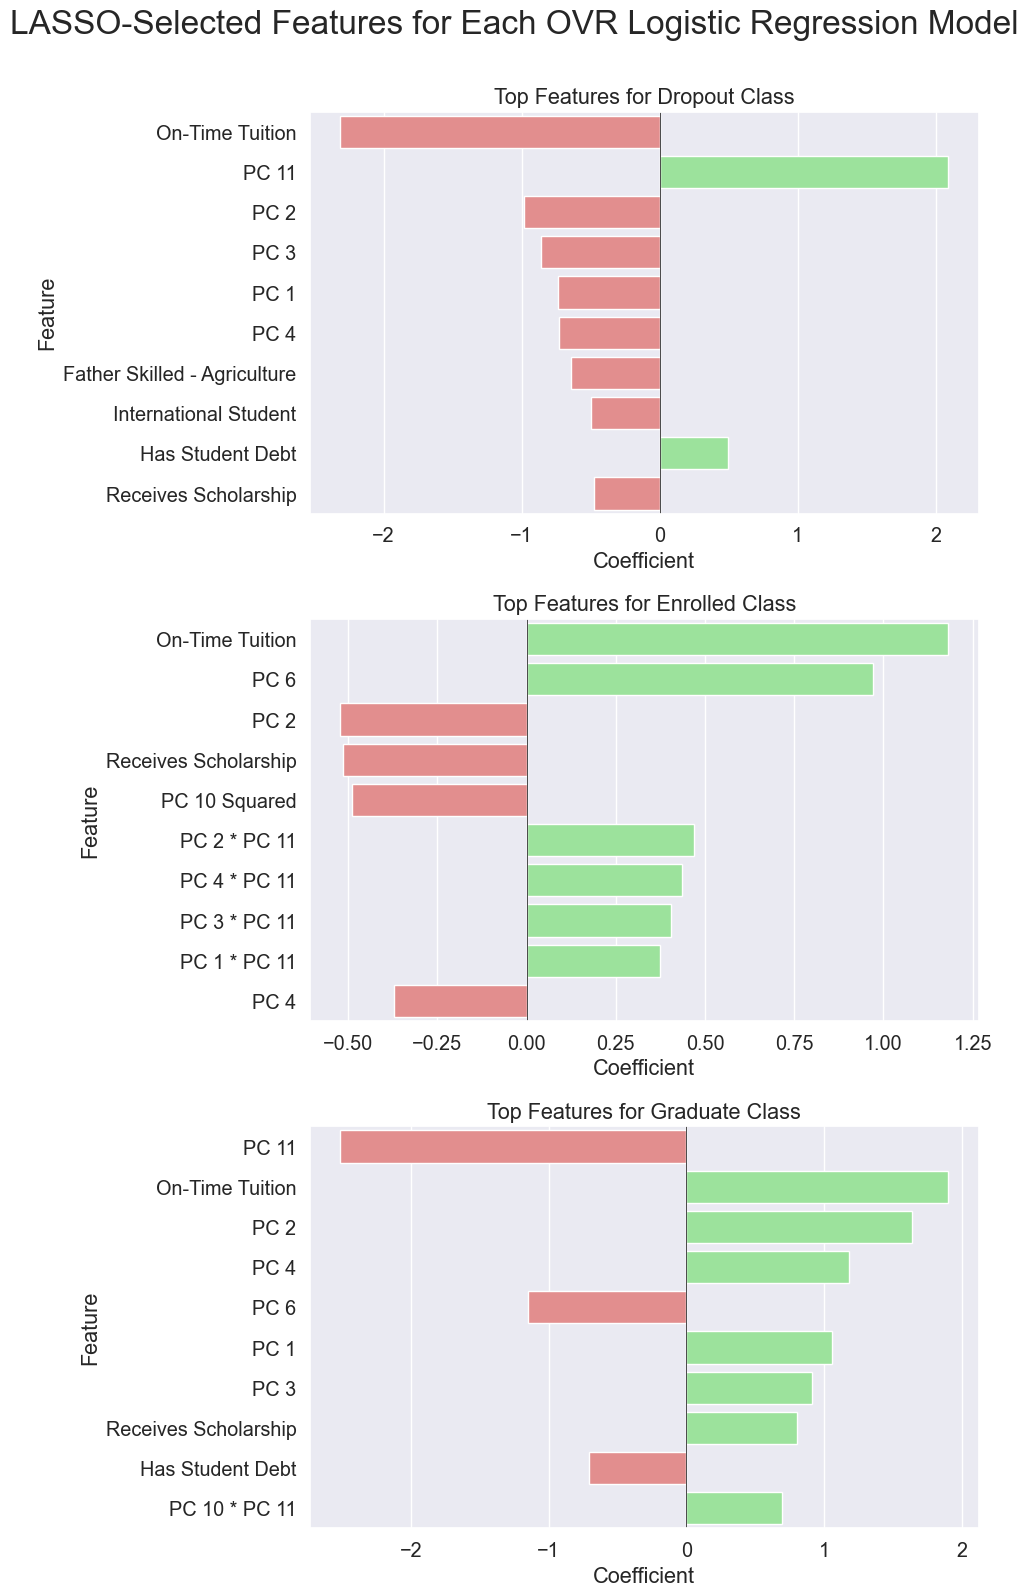

In [124]:
# extract the best model:
best_model = grid_search.best_estimator_

# get coefficients for each of the three ovr models I trained
estimators = best_model.named_steps["classifier"].estimators_
print("Number of models:", len(estimators))

# get feature names
numeric_predictor_names = (best_model.named_steps['preprocessor']
                .named_transformers_['num']
                .named_steps['poly']
                .get_feature_names_out())

categorical_predictor_names = (best_model.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out())

predictor_names = np.concatenate([numeric_predictor_names, categorical_predictor_names])


feature_mapping = {
    'tuition_up_to_date_1': 'On-Time Tuition',
    'x0': 'PC 1',
    'x1': 'PC 2',
    'x2': 'PC 3',
    'x3': 'PC 4',
    'x4': 'PC 5',
    'x5': 'PC 6',
    'x6': 'PC 7',
    'x7': 'PC 8',
    'x8': 'PC 9',
    'x9': 'PC 10',
    'x10': 'PC 11',
    'x10^2': 'PC 10 Squared',
    'x0 x10': 'PC 1 * PC 11',
    'x1 x10': 'PC 2 * PC 11',
    'x2 x10': 'PC 3 * PC 11',
    'x3 x10': 'PC 4 * PC 11',
    'x9 x10': 'PC 10 * PC 11',
    'father_occ_6': 'Father Skilled - Agriculture',
    'international_1': 'International Student',
    'debtor_1': 'Has Student Debt',
    'scholarship_1': 'Receives Scholarship'
}

# create a new figure for each model
fig, axes = plt.subplots(3, 1, figsize=(10, 16), sharey = False)
fig.suptitle('LASSO-Selected Features for Each OVR Logistic Regression Model', fontsize=24, y=1.00)


for i, (est, ax, class_name) in enumerate(zip(estimators, axes, best_model.classes_)):
    # Create coefficient DataFrame for this estimator
    coef_df = pd.DataFrame({
        'Feature': predictor_names,
        'Coefficient': est.coef_[0],
        'Abs_Coefficient': np.abs(est.coef_[0])
    })
    
    # map features
    coef_df['Feature'] = coef_df['Feature'].map(feature_mapping).fillna(coef_df['Feature'])

    # sort and get top features
    top_features = coef_df.nlargest(10, 'Abs_Coefficient')[['Feature', 'Coefficient']]
    
    # plot
    colors = ['lightcoral' if x < 0 else 'lightgreen' for x in top_features['Coefficient']]
    sns.barplot(data=top_features, y='Feature', x='Coefficient', ax=ax, palette=colors)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.set_title(f'Top Features for {class_name} Class')

plt.tight_layout()
plt.show()

Let's graph the ROC curve. Recall that because we used OVR, we have three models. This means that we have three different ROC curves.

In [127]:
# Get the three binary classifiers
estimators = best_model.named_steps['classifier'].estimators_

# Calculate ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

for i, (est, label, color) in enumerate(zip(estimators, best_model.classes_, colors)):
    # Get cross-validated probabilities for this binary classifier
    cv_probs = cross_val_predict(est, X_train, (y_train == label).astype(int), 
                                method='predict_proba', cv=10)
    
    # Get binary outcomes for this class
    y_binary = (y_train == label).astype(int)
    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_binary, cv_probs[:, 1])  # use second column for positive class
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, 
            label=f'{label} (AUC = {roc_auc:.4f})')

# Add random classifier reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curves for Student Outcome Prediction')
plt.legend()
plt.grid(True)
plt.show()

/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:1415: RuntimeWarning: Number of classes in training fold (2) does not match total number of classes (1). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1000x800 with 0 Axes>

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [52]:
grader.check("logreg")

logreg results:
    logreg - 1 result:
        ❌ Test case failed
        Trying:
            logreg_path = './submissions/submission_logreg.csv'
        Expecting nothing
        ok
        Trying:
            assert os.path.exists(logreg_path), 'Logistic Regression submission file not found.'
        Expecting nothing
        **********************************************************************
        Line 2, in logreg 0
        Failed example:
            assert os.path.exists(logreg_path), 'Logistic Regression submission file not found.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest logreg 0[1]>", line 1, in <module>
                assert os.path.exists(logreg_path), 'Logistic Regression submission file not found.'
                       ~~~~~~~~~~~~~~^^^^^^^^^^^^^
            AssertionError: Logistic Regression submission file not found.
        Trying:
            df_logreg = pd.read_csv(logreg_path)
        Expecting nothing
        **********************************************************************
        Line 3, in logreg 0
        Failed example:
            df_logreg = pd.read_csv(logreg_path)
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest logreg 0[2]>", line 1, in <module>
                df_logreg = pd.read_csv(logreg_path)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
                return _read(filepath_or_buffer, kwds)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 620, in _read
                parser = TextFileReader(filepath_or_buffer, **kwds)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1620, in __init__
                self._engine = self._make_engine(f, self.engine)
                               ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1880, in _make_engine
                self.handles = get_handle(
                               ~~~~~~~~~~^
                    f,
                    ^^
                ...<6 lines>...
                    storage_options=self.options.get("storage_options", None),
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                )
                ^
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/common.py", line 873, in get_handle
                handle = open(
                    handle,
                ...<3 lines>...
                    newline="",
                )
            FileNotFoundError: [Errno 2] No such file or directory: './submissions/submission_logreg.csv'
        Trying:
            expected_columns_logreg = ['ID', 'LogReg_Predicted']
        Expecting nothing
        ok
        Trying:
            assert list(df_logreg.columns) == expected_columns_logreg, 'Logistic Regression submission file columns do not match the expected format.'
        Expecting nothing
    

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

In [53]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [54]:
grader.check("dt")

dt results:
    dt - 1 result:
        ❌ Test case failed
        Trying:
            dt_path = './submissions/submission_dt.csv'
        Expecting nothing
        ok
        Trying:
            assert os.path.exists(dt_path), 'Decision Tree submission file not found.'
        Expecting nothing
        **********************************************************************
        Line 2, in dt 0
        Failed example:
            assert os.path.exists(dt_path), 'Decision Tree submission file not found.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest dt 0[1]>", line 1, in <module>
                assert os.path.exists(dt_path), 'Decision Tree submission file not found.'
                       ~~~~~~~~~~~~~~^^^^^^^^^
            AssertionError: Decision Tree submission file not found.
        Trying:
            df_dt = pd.read_csv(dt_path)
        Expecting nothing
        **********************************************************************
        Line 3, in dt 0
        Failed example:
            df_dt = pd.read_csv(dt_path)
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest dt 0[2]>", line 1, in <module>
                df_dt = pd.read_csv(dt_path)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
                return _read(filepath_or_buffer, kwds)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 620, in _read
                parser = TextFileReader(filepath_or_buffer, **kwds)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1620, in __init__
                self._engine = self._make_engine(f, self.engine)
                               ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1880, in _make_engine
                self.handles = get_handle(
                               ~~~~~~~~~~^
                    f,
                    ^^
                ...<6 lines>...
                    storage_options=self.options.get("storage_options", None),
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                )
                ^
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/common.py", line 873, in get_handle
                handle = open(
                    handle,
                ...<3 lines>...
                    newline="",
                )
            FileNotFoundError: [Errno 2] No such file or directory: './submissions/submission_dt.csv'
        Trying:
            expected_columns_dt = ['ID', 'DT_Predicted']
        Expecting nothing
        ok
        Trying:
            assert list(df_dt.columns) == expected_columns_dt, 'Decision Tree submission file columns do not match the expected format.'
        Expecting nothing
        **********************************************************************
        Line 5, in dt 0
        Failed example:

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

In [55]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [56]:
grader.check("custom")

custom results:
    custom - 1 result:
        ❌ Test case failed
        Trying:
            custom_path = './submissions/submission_custom.csv'
        Expecting nothing
        ok
        Trying:
            assert os.path.exists(custom_path), 'Custom Model submission file not found.'
        Expecting nothing
        **********************************************************************
        Line 2, in custom 0
        Failed example:
            assert os.path.exists(custom_path), 'Custom Model submission file not found.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest custom 0[1]>", line 1, in <module>
                assert os.path.exists(custom_path), 'Custom Model submission file not found.'
                       ~~~~~~~~~~~~~~^^^^^^^^^^^^^
            AssertionError: Custom Model submission file not found.
        Trying:
            df_custom = pd.read_csv(custom_path)
        Expecting nothing
        **********************************************************************
        Line 3, in custom 0
        Failed example:
            df_custom = pd.read_csv(custom_path)
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest custom 0[2]>", line 1, in <module>
                df_custom = pd.read_csv(custom_path)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
                return _read(filepath_or_buffer, kwds)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 620, in _read
                parser = TextFileReader(filepath_or_buffer, **kwds)
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1620, in __init__
                self._engine = self._make_engine(f, self.engine)
                               ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/parsers/readers.py", line 1880, in _make_engine
                self.handles = get_handle(
                               ~~~~~~~~~~^
                    f,
                    ^^
                ...<6 lines>...
                    storage_options=self.options.get("storage_options", None),
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                )
                ^
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/site-packages/pandas/io/common.py", line 873, in get_handle
                handle = open(
                    handle,
                ...<3 lines>...
                    newline="",
                )
            FileNotFoundError: [Errno 2] No such file or directory: './submissions/submission_custom.csv'
        Trying:
            expected_columns_custom = ['ID', 'Custom_Predicted']
        Expecting nothing
        ok
        Trying:
            assert list(df_custom.columns) == expected_columns_custom, 'Custom Model submission file columns do not match the expected format.'
        Expecting nothing
        *******************************

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [57]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [58]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [59]:
hours_spent_on_hw = ...

In [60]:
grader.check("wrapup")

wrapup results:
    wrapup - 1 result:
        ❌ Test case failed
        Trying:
            assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
        Expecting nothing
        **********************************************************************
        Line 1, in wrapup 0
        Failed example:
            assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
        Exception raised:
            Traceback (most recent call last):
              File "/Users/julienberman/micromamba/envs/cs109a/lib/python3.13/doctest.py", line 1395, in __run
                exec(compile(example.source, filename, "single",
                ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                             compileflags, True), test.globs)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "<doctest wrapup 0[0]>", line 1, in <module>
                assert float(hours_spent_on_hw), 'Please select a time in hours (int or float) to specify how long you spent on this assignment.'
                       ~~~~~^^^^^^^^^^^^^^^^^^^
            TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [61]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 0.07 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
